# U.S. Medical Insurance Costs

In [335]:
from sklearn.preprocessing import StandardScaler
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [336]:
warnings.filterwarnings('ignore')


In [337]:
data = pd.read_csv('insurance.csv')

In [338]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [339]:
data.describe(include = "all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Given a dataset on US **insurance data** we are going to analyse the data to determine the extent to which Age, Sex, BMI, Children, Smoking status and Region have an effect on the price of insurance in the US.

The data gives us 1338 records, of patients with a mean age of 39 years old, ranging from 18 to 64 with an insurance price ranging from \\$1122 to \\$63700.

My hypothesis, would be that younger non smokers will have cheaper insurance

****

We can see that the data is split fairly evenly between male and female with slightly over half the records being from male patients

In [340]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:ylabel='sex'>

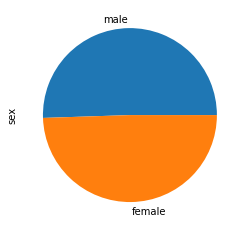

In [341]:
data.sex.value_counts().plot.pie()

The age data is fairly homogeneous, with a left skew. 

<AxesSubplot:xlabel='age', ylabel='Count'>

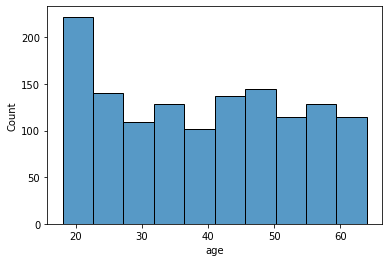

In [342]:
sns.histplot(data = data, x = 'age', bins = 10)

<AxesSubplot:xlabel='age', ylabel='charges'>

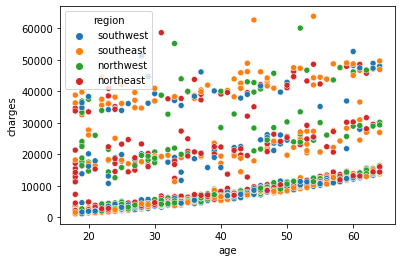

In [343]:
sns.scatterplot(data = data, x = 'age', y = 'charges', hue = 'region')
#this plot tries to explain if there is a linear relationship of age and charges and if this
#can be explored via the region. There appears to be a pattern here of 3 sets of data but this
#is not clearly explained by region

In [344]:
class Get_Averages():
    def __int__():
        self.data = data
        self.region = region
        
    def get_average_cost(self,data,region):
        mean = data.loc[data['region'] == region].charges.mean()
        median = data.loc[data['region'] == region].charges.median()
        mad = data.loc[data['region'] == region].charges.mad()
        std = data.loc[data['region'] == region].charges.std()
        print(f'Mean in {region} is: {mean}, Median: {median} and Standard Deviation: {std}')
        return mean,median,std
    
    def get_average_age(self,data,region):
        mean = data.loc[data['region'] == region].age.mean()
        median = data.loc[data['region'] == region].age.median()
        mad = data.loc[data['region'] == region].age.mad()
        std = data.loc[data['region'] == region].age.std()
        print(f'Mean in {region} is: {mean}, Median: {median} and Standard Deviation: {std}')
        return mean,median,std
    

In [345]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


***
 

In [346]:
averages = Get_Averages()
#The class can tell you the average costs or ages for each region in the dataframe

In [347]:
averages.get_average_age(data, 'southwest')

Mean in southwest is: 39.45538461538462, Median: 39.0 and Standard Deviation: 13.959885549616967


(39.45538461538462, 39.0, 13.959885549616967)

<AxesSubplot:xlabel='age', ylabel='charges'>

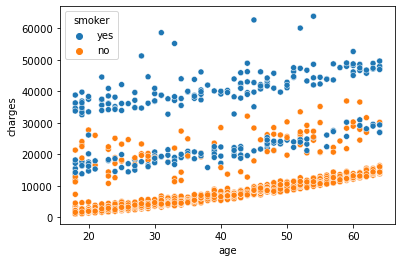

In [353]:
sns.scatterplot(data = data, x = 'age', y = 'charges', hue = 'smoker')
#extrapolating the same plot, but factoring in smoking status, we can ee that smoking status 
#leads to an increased insurance charge for all ages. 

<BarContainer object of 1338 artists>

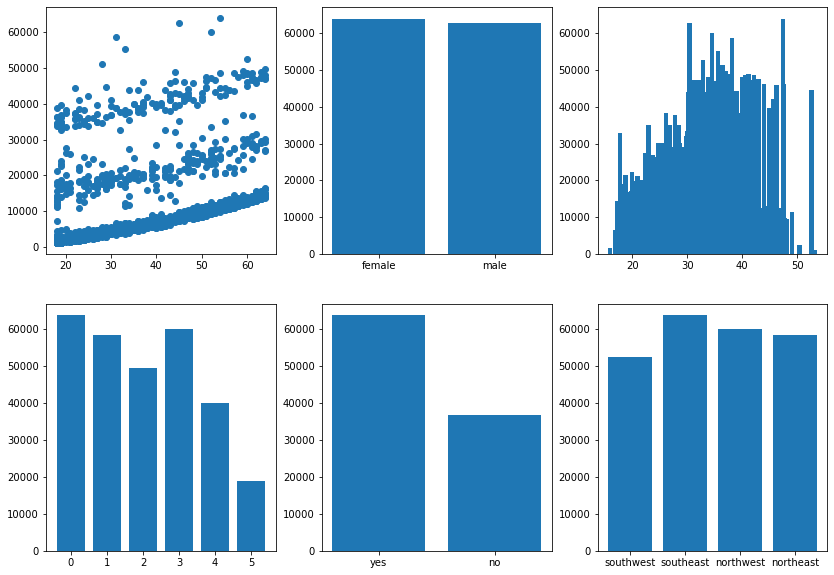

In [351]:
fig, ((ax1, ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(2, 3,figsize = (14,10))

ax1.scatter(data['age'], data['charges'])
ax2.bar(data['sex'],data['charges'])
ax3.bar(data['bmi'],data['charges'])
ax4.bar(data['children'], data['charges'])
ax5.bar(data['smoker'],data['charges'])
ax6.bar(data['region'],data['charges'])

In [193]:
#lets try and fit our data to a multiple linear regression model, to find out if we can predict
#charges, based on BMI, smoking status, region.

#First step is to change our categorical variables into integers so we can feed them into our model.
#We will replace each region with a number.

In [276]:
model_data = data.replace({'southwest':1, 'southeast':2, 'northwest':3,'northeast':4},inplace = True)

In [277]:
#Next we will change smoking output and sex to binary outputs.

In [282]:
model_data = data.replace({'male':1, 'female':0, 'yes':1, 'no':0})

In [283]:
model_data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,1,16884.9240
1,18,1,33.77,1,0,2,1725.5523


In [284]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [289]:
y = model_data['charges']
X = model_data[['age','sex','bmi','children','smoker','region']]

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [390]:
model = LinearRegression()

In [391]:
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(f'Our model has an accuracy of {score * 100} %')

Our model has an accuracy of 75.85877085021139 %


In [397]:
y_hat = model.predict([[28,0,23,0,0,4]])
print(y_hat)

[3095.68684616]


In [294]:
for i in range(18,50):
    print(model.predict([[i,1,26,0,0,3]]))
    

[774.68987914]
[1031.33159055]
[1287.97330197]
[1544.61501338]
[1801.2567248]
[2057.89843622]
[2314.54014763]
[2571.18185905]
[2827.82357047]
[3084.46528188]
[3341.1069933]
[3597.74870472]
[3854.39041613]
[4111.03212755]
[4367.67383897]
[4624.31555038]
[4880.9572618]
[5137.59897322]
[5394.24068463]
[5650.88239605]
[5907.52410746]
[6164.16581888]
[6420.8075303]
[6677.44924171]
[6934.09095313]
[7190.73266455]
[7447.37437596]
[7704.01608738]
[7960.6577988]
[8217.29951021]
[8473.94122163]
[8730.58293305]
